# **Customer Churn Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Pandas - Powerful library for data manipulation and analysis**

# **Load Data File**

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

# **Top 5 Records of Data**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
df.isnull().sum()


,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.dropna()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **Numpy - Numerical calculations and working with arrays**

In [ ]:
import numpy as np


In [ ]:
np.array([1,2,3])
np.zeros(5)
np.ones(3)
np.arange(1,10,2)
np.linspace(0,1,5)


array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
arr1=np.array([[1,2,3],[4,5,6]])
print(type(arr1))
print(arr1)

<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]


In [ ]:
np.arange(1,10,2).reshape(5,1)


array([[1],
       [3],
       [5],
       [7],
       [9]])

In [ ]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
np.sqrt(6)

np.float64(2.449489742783178)

In [ ]:
np.log(45)

np.float64(3.8066624897703196)

In [ ]:
np.exp(arr1)

array([[  2.71828183,   7.3890561 ,  20.08553692],
       [ 54.59815003, 148.4131591 , 403.42879349]])

In [ ]:
np.sin(arr1)

array([[ 0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ]])

In [ ]:
arr2=np.array([[2,4,6],[3,5,9]])
arr2[1][0]

np.int64(3)

In [ ]:
np.random.rand(5)


array([0.47425956, 0.77428245, 0.33143385, 0.81965758, 0.68266558])

In [ ]:
np.random.randint(1,100,10)


array([23, 20, 17, 46, 75, 95, 99, 35, 78, 97])

# **Matplotlib - Tool for data visualization**

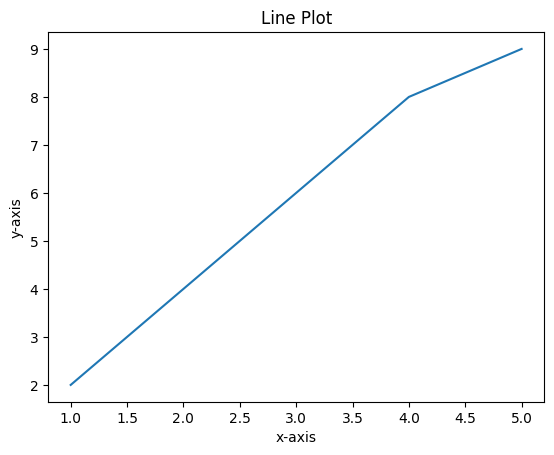

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 9]
plt.plot(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Line Plot')
plt.show()

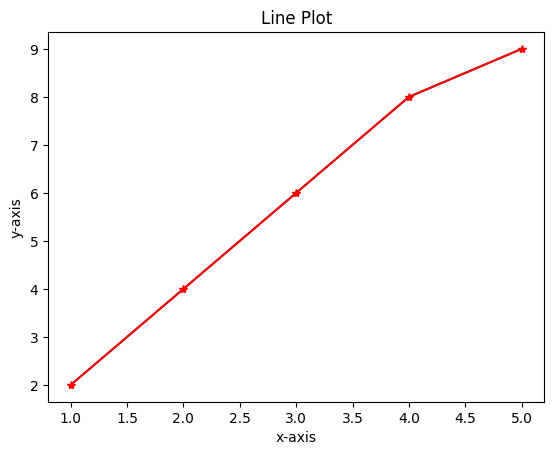

In [ ]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 9]
plt.plot(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Line Plot')
plt.plot(x, y, 'red',marker="*",markersize=6)
plt.show()

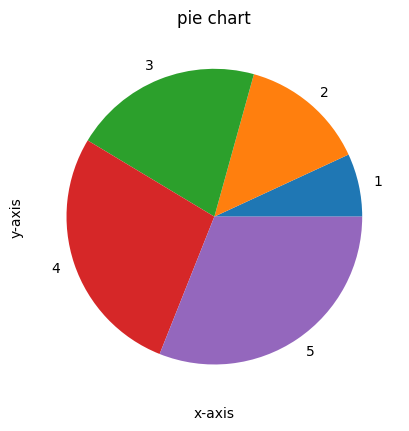

In [ ]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 9]
plt.plot(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('pie chart')
plt.pie(y,labels=x)

plt.show()

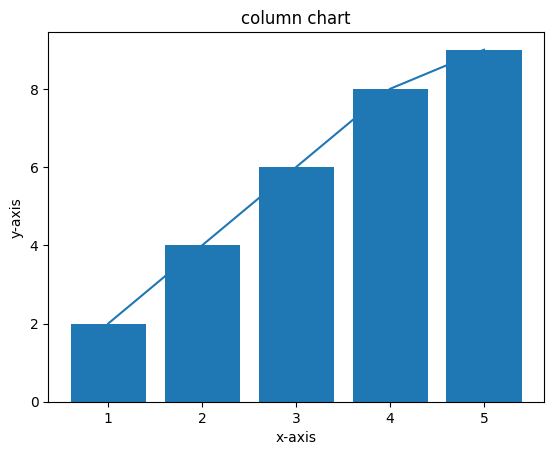

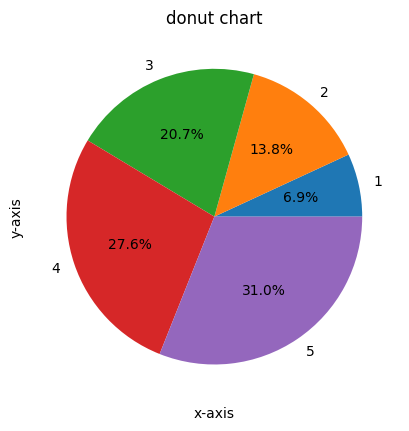

In [ ]:
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 9]
plt.plot(x, y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('donut chart')
plt.pie(y,labels=x,autopct='%1.1f%%')


plt.show()



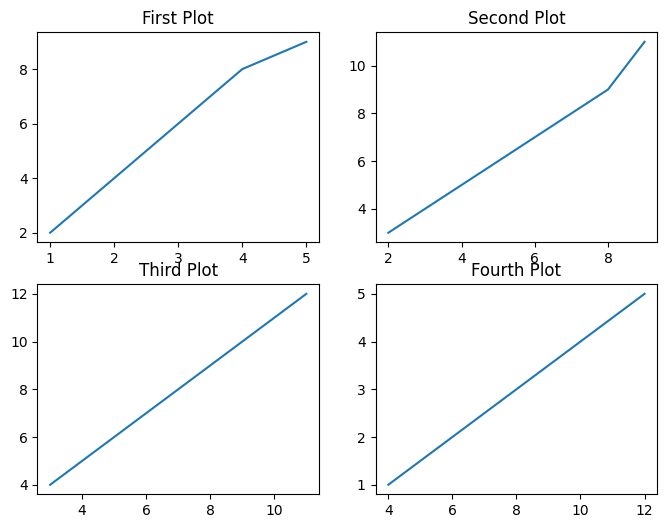

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 9]
z = [3, 5, 7, 9, 11]
w = [4, 6, 8, 10, 12]
plt.subplot(2,2,1)
plt.plot(x, y)
plt.title('First Plot')
plt.subplot(2,2,2)
plt.plot(y, z)
plt.title('Second Plot')
plt.subplot(2,2,3)
plt.plot(z, w)
plt.title('Third Plot')
plt.subplot(2,2,4)
plt.plot(w, x)
plt.title('Fourth Plot')

plt.show()

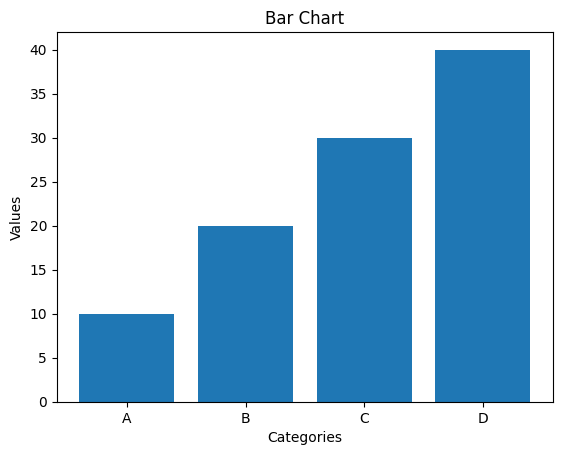

In [ ]:
categories = ['A', 'B', 'C', 'D']
values = [10, 20, 30, 40]
plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.color='red'
plt.title('Bar Chart')
plt.show()

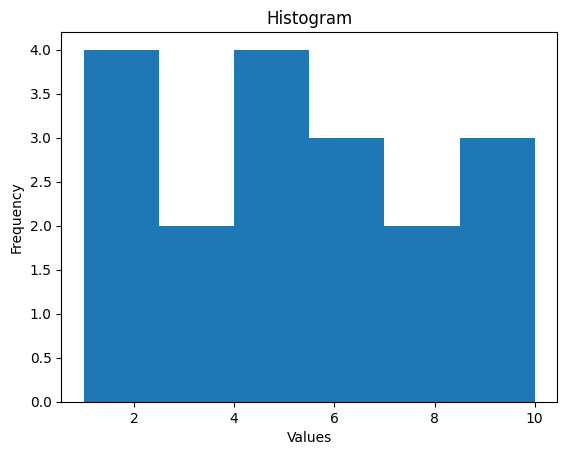

In [ ]:
data = [1,1,2,3,4.2,3,1,6,5,7,8,6,9,6,9,4,5,10]
plt.hist(data,bins=6)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

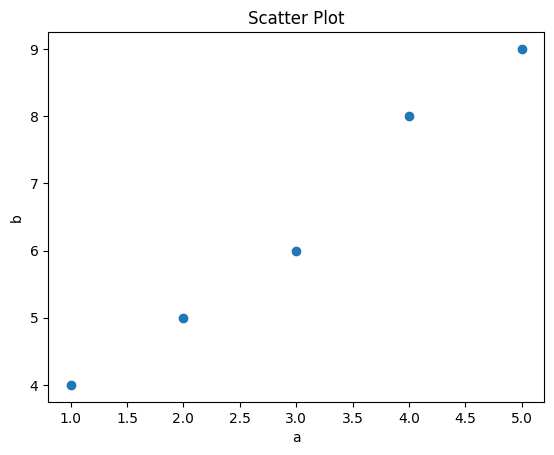

In [ ]:
a=[1,2,3,4,5]
b=[4,5,6,8,9]
plt.scatter(a,b)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Scatter Plot')
plt.show()

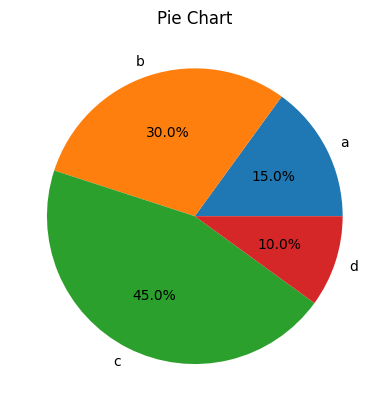

In [ ]:
labels = ['a', 'b', 'c', 'd']
sizes = [15, 30, 45, 10]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart')
explode = (0.1, 0, 0, 0)
plt.show()

# **Seaborn - Advanced Visualization**

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


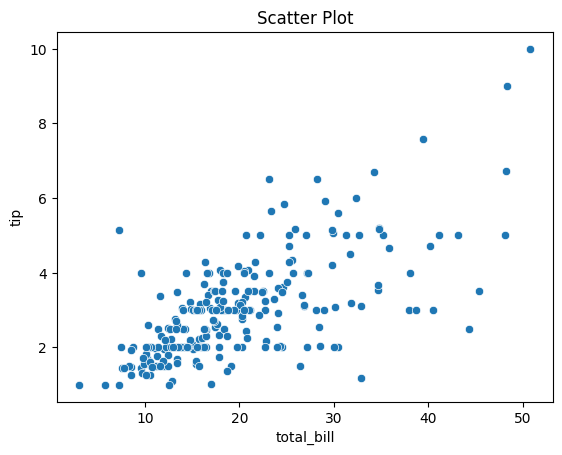

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.title('Scatter Plot')
plt.show()



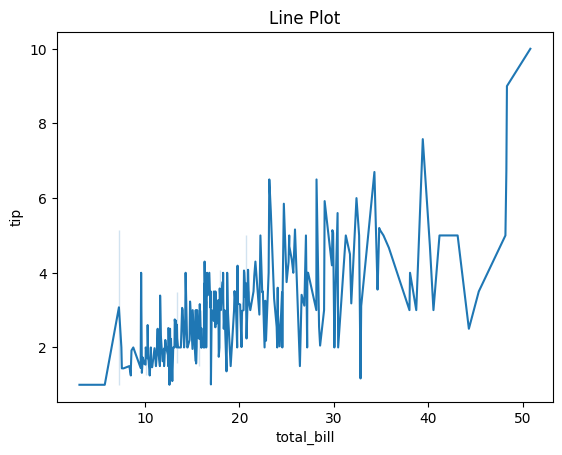

In [ ]:
sns.lineplot(x='total_bill',y='tip',data=df)
plt.title('Line Plot')
plt.show()

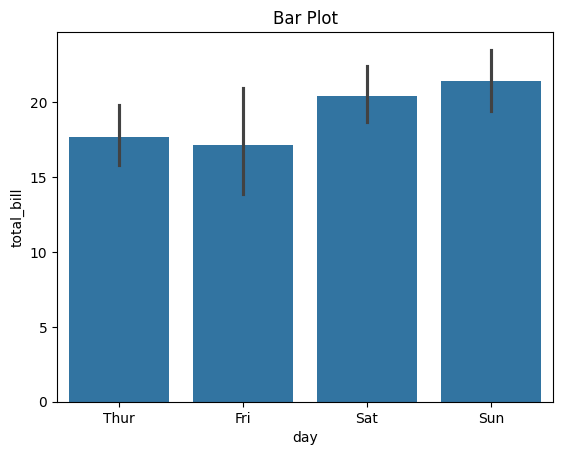

In [ ]:
sns.barplot(x='day',y='total_bill',data=df)
plt.title('Bar Plot')
plt.show()

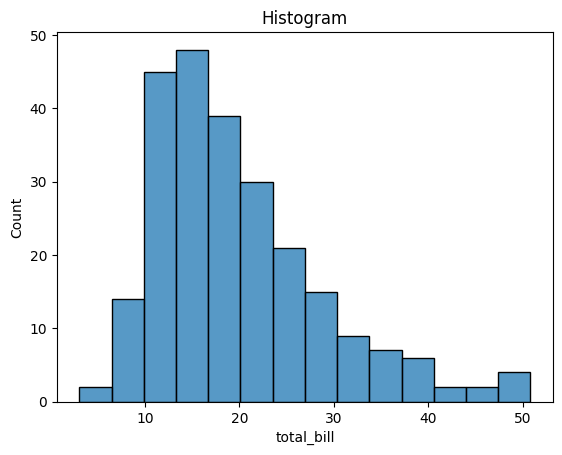

In [ ]:
sns.histplot(x='total_bill',data=df)
plt.title('Histogram')
plt.show()

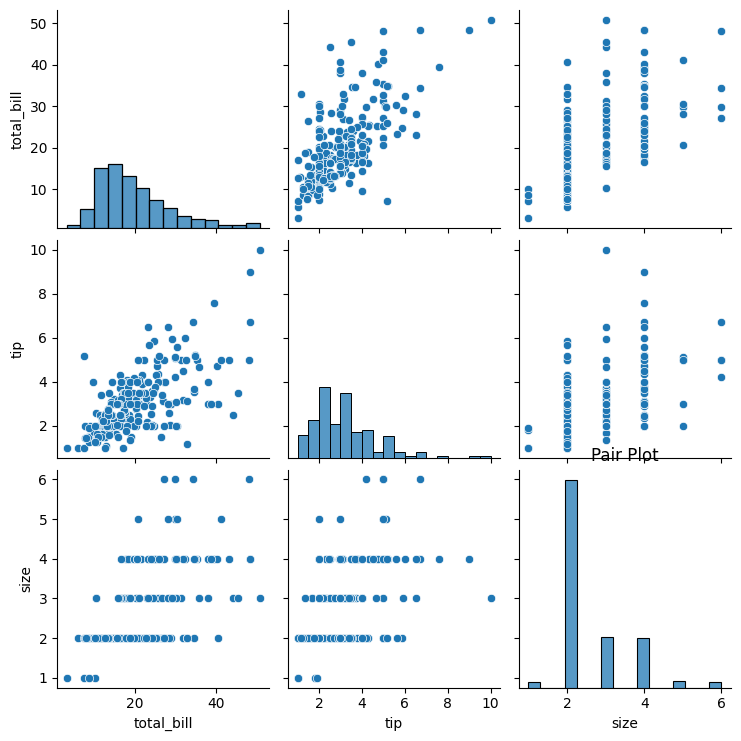

In [ ]:
sns.pairplot(df)
plt.title('Pair Plot')
plt.show()

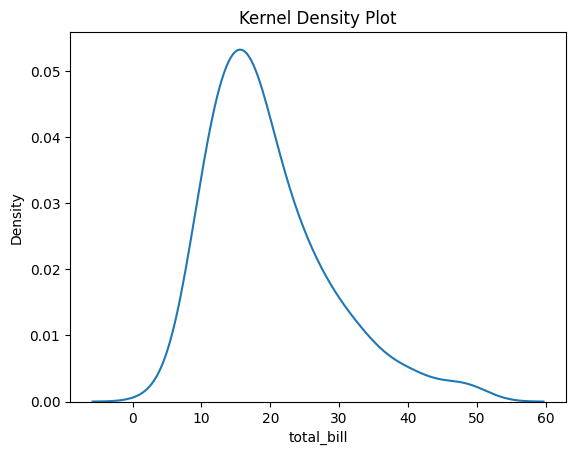

In [ ]:
sns.kdeplot(data=df['total_bill'])
plt.title('Kernel Density Plot')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

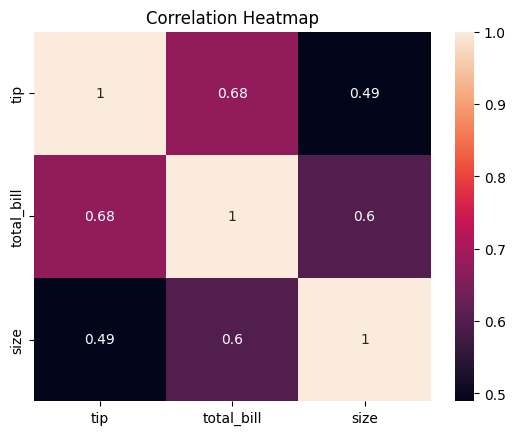

In [ ]:
corr = df[['tip','total_bill','size']].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
